In [14]:
import os
import numpy as np
import librosa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [16]:
# Define the path to the audio files
data_path = 'D:/DA/Skripsi/Datasets/AccentBased/'

# Define the number of MFCC coefficients
n_mfcc_c = 40 # 13 20 26

# Define the number of neighbors for KNN
n_neighbors_c = 3

# Define the test size for train-test split
test_size = 0.3

# Frame size
n_fft_c = 4096 #256 521 1024

# Pre emphasis
preemp_c = 0.97

# Window
window_type = 'hann'  # Choose window type (e.g., 'hann', 'hamming', 'blackman', etc.)
window_size = 2048    # Choose window size (e.g., 2048, 4096, etc.)
hop_length = 512      # Choose hop length (e.g., 512, 256, etc.)

In [17]:
# Define a function to pre-process audio signals
def preprocess_audio(audio, preemphasis = 0.97):
    # Normalize the audio signal
    audio_norm = librosa.util.normalize(audio)
    # Apply pre-emphasis filter
    pre_emphasis = preemphasis
    audio_preemph = np.append(audio_norm[0], audio_norm[1:] - pre_emphasis * audio_norm[:-1])
    return audio_preemph

In [18]:
# Define a function to extract MFCC features from audio files
def extract_features(file_path, n_mfcc = 20, preemphasis = 0.97, n_fft = 2048):
    audio, sr = librosa.load(file_path)
    audio_preprocessed = preprocess_audio(audio, preemphasis = preemphasis)
    mfccs = librosa.feature.mfcc(y=audio_preprocessed, sr=sr, n_mfcc=n_mfcc, n_fft = n_fft)
    # Test
    # mfccs = librosa.feature.mfcc(y=audio_preprocessed, sr=sr)
    # Flatten MFCCs into a 1D array using mean
    mfccs = np.mean(mfccs, axis=1)

    # Reshape MFCCs into a 2D array with a single row
    mfccs = mfccs.reshape(1, -1)

    # Turn the multidimensional array into 1 dimensional array
    flattened_mfcc = mfccs.flatten()

    return flattened_mfcc

In [20]:
# Extract features from audio files in folder
X = []
y = []
for file_name in os.listdir(data_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(data_path, file_name)
        feature = extract_features(file_path, n_mfcc=n_mfcc_c, n_fft=n_fft_c)
        X.append(feature)
        label = file_name.split("_")[0]  # Assume label is first part of file name before "_"
        y.append(label)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Train a KNN classifier on the training set
knn = KNeighborsClassifier(n_neighbors=n_neighbors_c)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

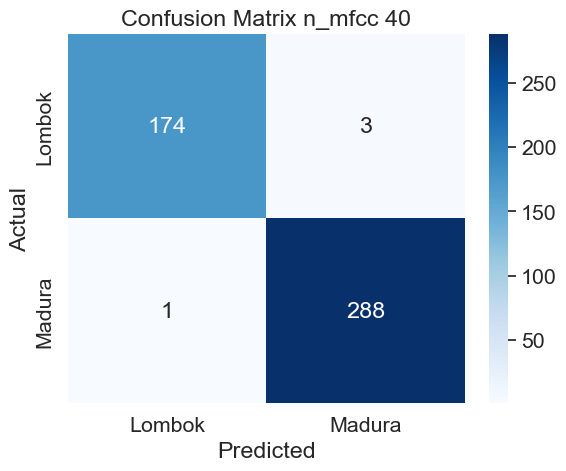

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Set labels for the matrix
labels = ['Lombok', 'Madura']

# Create a heatmap using Seaborn
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix n_mfcc 40')
plt.show()

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Lombok
f1_lombok = f1_score(y_test, y_pred, average="binary", pos_label="Lombok")
recall_lombok = recall_score(y_test, y_pred, average="binary", pos_label="Lombok")
precision_lombok = precision_score(y_test, y_pred, average="binary", pos_label="Lombok")
print(f"Recall : {recall_lombok}")
print(f"Precision : {precision_lombok}")
print(f"F1 Score : {f1_lombok}")

Recall : 0.9830508474576272
Precision : 0.9942857142857143
F1 Score : 0.9886363636363638


In [24]:
# Madura
f1_madura = f1_score(y_test, y_pred, average="binary", pos_label="Madura")
recall_madura = recall_score(y_test, y_pred, average="binary", pos_label="Madura")
precision_madura = precision_score(y_test, y_pred, average="binary", pos_label="Madura")
print(f"Recall : {recall_madura}")
print(f"Precision : {precision_madura}")
print(f"F1 Score : {f1_madura}")

Recall : 0.9965397923875432
Precision : 0.9896907216494846
F1 Score : 0.993103448275862


In [25]:
joblib.dump(knn, 'knn_model_test.pkl')

['knn_model_test.pkl']